Distribution : 
 [0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]


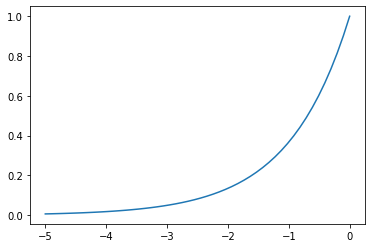

In [2]:
from scipy.stats import expon

import numpy as np 
import matplotlib.pyplot as plt 

rv = expon()

distribution = np.linspace(0, np.minimum(rv.dist.b, 5)) 
print("Distribution : \n", distribution) 
  
plot = plt.plot(distribution*-1, rv.pdf(distribution))

In [3]:
quarantine_days = np.linspace(0, 240, num=240)

In [4]:
# Toilet paper sales
a = 1000000
b = 150
k = 0.05
x = quarantine_days
toilet_paper_sales = a /(1 + b*np.exp(-k*x))

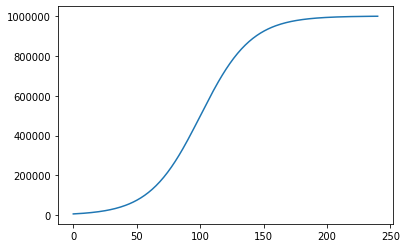

In [5]:
plot = plt.plot(quarantine_days, toilet_paper_sales, label='logistic growth')
plt.show()

In [7]:
sales_data = toilet_paper_sales[:120]
sales_dict = {
    'day': quarantine_days[:120],
    'sales': sales_data
}

In [ ]:
sales_dict.to_csv('sales_data.csv')

a) ratio of avg cars outside at day 1 to day n

b) avg toilet paper available in grocery stores

c) number of infected

d) number of deceased

e) hours in news TV programs dedicated to covid

References

https://people.richland.edu/james/lecture/m116/logs/models.html

Raw data:

a) number of infected in first 120 days + 120 days projection

b) number of deceased in first 120 days + 120 days projection

c) DB with news outlets schedule for one channel in first 120 days

d) inventory of a sample of grocery stores in first 120 days

e) number of cars at a given time that are captured by a camara in Morones Prieto in first 120 days

In [5]:
# Number of deceased
a = 1000
b = 150
k = 0.025
x = quarantine_days
deceased = a / (1 + b*np.exp(-k*x)) - 6

In [6]:
# Number of infected
a = 1000
b = 150
k = 0.075
x = quarantine_days
infected = a / (1 + b*np.exp(-k*x))

In [7]:
news_schedule = [
    ['kemonito', 'choque', 'trafico'],
    ['kemonito', 'choque', 'trafico'],
    ['kemonito', 'covid', 'trafico'],
    ['kemonito', 'choque', 'trafico'],
    ['kemonito', 'choque', 'covid'],
    ['kemonito', 'choque', 'trafico'],
    ['kemonito', 'choque', 'trafico'],
    ['kemonito', 'choque', 'covid'],
    ['kemonito', 'choque', 'covid'],
    ['kemonito', 'choque', 'covid'],
    ['kemonito', 'choque', 'covid'],
    ['covid', 'choque', 'covid'],
    ['covid', 'choque', 'covid'],
    ['kemonito', 'choque', 'trafico'],
    ['kemonito', 'choque', 'trafico'],
    ['kemonito', 'choque', 'covid'],
    ['kemonito', 'choque', 'covid'],
    ['covid', 'covid', 'covid'],
    ['covid', 'covid', 'kemonito'],
    ['covid', 'covid', 'covid'],
    ['covid', 'covid', 'kemonito'],
    ['covid', 'covid', 'kemonito'],
    ['covid', 'covid', 'covid'],
    ['covid', 'covid', 'covid'],
]

In [8]:
real_schedule = []
for s in news_schedule:
    for _ in range(5):
        real_schedule.append(s)

In [9]:
news_freq = []
for s in real_schedule:
    news_freq.append(s.count('covid'))

In [10]:
len(real_schedule)

120

In [11]:
quarantine_days = np.linspace(0, 120, num=120)

In [12]:
# Toilet paper inventory in grocery store
a = 10000
b = 1
k = -0.025
x = quarantine_days
grocery_store_1 = a /(1 + b*np.exp(-k*x))

a = 1000
b = 1
k = -0.025
x = quarantine_days
grocery_store_2 = a /(1 + b*np.exp(-k*x))

a = 10000
b = 1
k = -0.01
x = quarantine_days
grocery_store_3 = a /(1 + b*np.exp(-k*x))

In [13]:
np.max(grocery_store_1)

5000.0

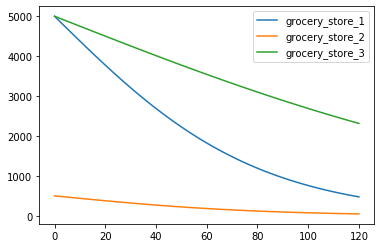

In [14]:
plt.plot(quarantine_days, grocery_store_1, label='grocery_store_1')
plt.plot(quarantine_days, grocery_store_2, label='grocery_store_2')
plt.plot(quarantine_days, grocery_store_3, label='grocery_store_3')
plt.legend()

In [15]:
# Number of cars
a = 10000
b = 1
k = -0.03
x = quarantine_days
cars = (a*np.random.normal(np.abs(50-x)) /(1 + b*np.exp(-k*x) + np.random.normal(20)))

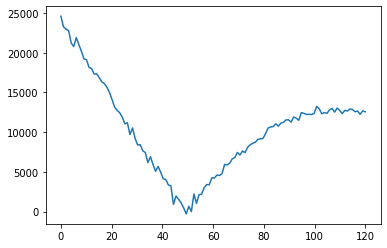

In [16]:
plt.plot(quarantine_days, cars)

In [17]:
dataset = {
    'quarantine_day': quarantine_days,
    'infected': infected[:120],
    'deceased': deceased[:120],
    'news_freq': news_freq,
    'grocery_store_1': grocery_store_1,
    'grocery_store_2': grocery_store_2,
    'grocery_store_3': grocery_store_3,
    'avg_cars_per_day': cars
}

In [18]:
import pandas as pd

In [20]:
synth_raw_data = pd.DataFrame(dataset).astype(int)

In [21]:
synth_raw_data.to_csv('raw_data.csv')